In [1]:
#Import al the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.formula.api as sm
import scipy, scipy.stats
import math 
from collections import Counter


In [2]:
#Read the data from file
df = pd.read_csv("C:\\Users\\SAN\\Desktop\\Imarticus Screenshots\\Python Codes\\Project  5 and 6\\LGD\\LGD_Data.csv")

In [3]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 7 columns):
Ac_No                  15290 non-null int64
Age                    15290 non-null int64
Years of Experience    15290 non-null int64
Number of Vehicles     15290 non-null int64
Gender                 15290 non-null object
Married                15290 non-null object
Losses in Thousands    15290 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 836.2+ KB


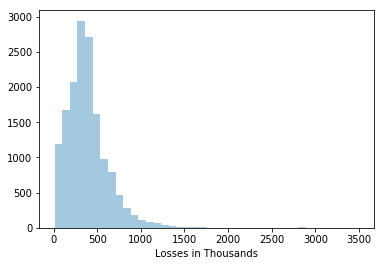

In [4]:
sns.distplot(df['Losses in Thousands'], kde=False, bins = 40)
#Below plot wll show it is right skewed
#But as per our assumptions,dependent variable should be normally distributed

In [5]:
#To mae it normally distributed we should take the log and try
#Taking the log of the coulmn and storing it in a temporary varable 
#sns.distplot(map(math.log(df['Losses in Thousands'])),kde=False,bins=50)
log_losses = np.log(df['Losses in Thousands'])

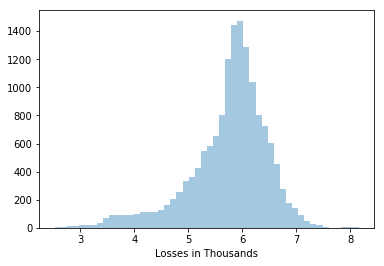

In [6]:
#Trying to plot the temp variable
sns.distplot(log_losses,kde=False,bins=50)
#The plot is not skewed anymore, so we can proceed

In [7]:
#Simple Model Building
#Creating the Dummy Variables
#For Gender
dummy_var=pd.get_dummies(df['Gender'],drop_first=True)
print( (dummy_var.head()))
dummy_var1=pd.get_dummies(df['Gender'],drop_first=True)

#For Married
dummy_var2=pd.get_dummies(df['Married'],drop_first=True)
dummy_var2.head()

# merge the above 2 dataframe with the original dataframe df
df_new=pd.concat([df,dummy_var1,dummy_var2],axis=1)
df_new.head()

   M
0  1
1  0
2  1
3  0
4  1


,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands,M,Single
0,150024,24,5,1,M,Married,203.319595,1,0
1,144880,31,10,1,F,Single,402.197302,0,1
2,133742,56,37,1,M,Married,553.132096,1,0
3,151282,52,31,1,F,Married,292.430579,0,0
4,174407,20,3,1,M,Single,246.540576,1,1


In [9]:
#Removing Married and gender Columns. We will use their dummies instead
df_new2=df_new.drop(['Gender','Married'],axis=1)
df_new2.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,M,Single
0,150024,24,5,1,203.319595,1,0
1,144880,31,10,1,402.197302,0,1
2,133742,56,37,1,553.132096,1,0
3,151282,52,31,1,292.430579,0,0
4,174407,20,3,1,246.540576,1,1


In [22]:
#Model Building 
x=df_new2[["Age","Number of Vehicles","M","Single"]]
y=df_new2["Losses in Thousands"]
#Splitting original data to train and test
from sklearn.cross_validation import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


from sklearn.linear_model import LinearRegression 
lm=LinearRegression() #call the function
lm.fit(x_train,y_train)# fit the model


print(lm.intercept_) # see the intercept
print(lm.coef_)# see the betas
#see the error parameters
from sklearn import metrics
#make prediction
pred=lm.predict(x_test)

from sklearn.metrics import r2_score
print (r2_score(y_test, pred))
print (metrics.mean_absolute_error(y_test,pred))
print (metrics.mean_absolute_error(y_test,pred))

539.656523011
[  -6.14900704   -1.79059246   97.23493268  136.7922503 ]
0.295052575449
148.508192122
148.508192122


In [11]:
#so the linear regression equation we get is
#----loss in thousands=539.65-6.14*Age-1.79*Number of Vehicles+97*M+136*Single
#Improving the Model For Frist Time

In [12]:
print (df_new2.head())
df_new2["AgeCategory"]=["Young" if df_new2['Age'][i]<=28 else "MiddleAged" if 28<df_new2['Age'][i]<58 else "Old" for i in range(len(df_new2))]
df_new2['Logy']=list(map(math.log,df_new2['Losses in Thousands']))
# map(anyfunction, list)--> to apply the function on each element in the list
Counter(df_new2['AgeCategory'])
# we wil have to convert the AgeCategory to dummy varables
dummy_var3=pd.get_dummies(df_new2['AgeCategory'],drop_first=True)
df_new3=pd.concat([df_new2,dummy_var3],axis=1)
df_new3.head()

    Ac_No  Age  Years of Experience  Number of Vehicles  Losses in Thousands  \
0  150024   24                    5                   1           203.319595   
1  144880   31                   10                   1           402.197302   
2  133742   56                   37                   1           553.132096   
3  151282   52                   31                   1           292.430579   
4  174407   20                    3                   1           246.540576   

   M  Single  
0  1       0  
1  0       1  
2  1       0  
3  0       0  
4  1       1  


,Ac_No,Age,Years of Experience,Number of Vehicles,Losses in Thousands,M,Single,AgeCategory,Logy,Old,Young
0,150024,24,5,1,203.319595,1,0,Young,5.314779,0,1
1,144880,31,10,1,402.197302,0,1,MiddleAged,5.996943,0,0
2,133742,56,37,1,553.132096,1,0,MiddleAged,6.315597,0,0
3,151282,52,31,1,292.430579,0,0,MiddleAged,5.678227,0,0
4,174407,20,3,1,246.540576,1,1,Young,5.507527,0,1


In [13]:
Counter(df_new2['AgeCategory'])

Counter({'MiddleAged': 5425, 'Old': 4708, 'Young': 5157})

In [15]:
#deicde the new x and y variables
x=df_new3[["Age","M","Single","Old","Young"]]
y=df_new3["Logy"]

In [16]:
#split the data into train and test
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [17]:
from sklearn.linear_model import LinearRegression # import the functions
lm=LinearRegression() #call the function
lm.fit(x_train,y_train)# fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
#see the error parameters
from sklearn import metrics
#make prediction
pred=lm.predict(x_test)
metrics.mean_absolute_error(y_test,pred)
from sklearn.metrics import r2_score
print (r2_score(y_test, pred))
# the r2 has improved
print (metrics.mean_absolute_error(y_test,pred))
print (metrics.mean_absolute_error(y_test,pred))
print (metrics.mean_absolute_error(y_test,pred))

0.295052575449
148.508192122
148.508192122
148.508192122


In [19]:
print(lm.intercept_) # see the intercept
print(lm.coef_)# see the betas
# now the equation will be
#"Age","Number of Vehicles","M","Single","Old","Young"
#log(losses in Thousands)= 5.91-0.005*(Age)+0.005*(#ofVehicles)+
#0.21*(Male)+0.31*(Single)-0.70*(Old)+0.02*(Young)

5.92784894026
[-0.00550408  0.21257821  0.31651095 -0.70187767  0.02316753]


In [26]:
#see the error parameters
from sklearn import metrics
#make prediction
pred=lm.predict(x_test)

from sklearn.metrics import r2_score
print (r2_score(y_test, pred))
print (metrics.mean_absolute_error(y_test,pred1))

0.295052575449
148.508192122


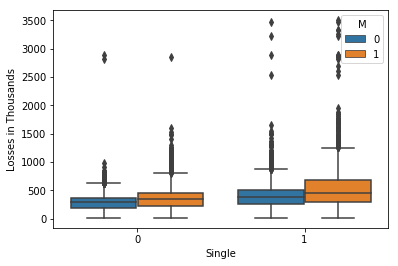

In [33]:
#Improving the Model For Second Time
sns.boxplot()
sns.boxplot(x="Single",y="Losses in Thousands",data=df_new3,hue="M")
#this shows that sinle ppl & Male are the worst

In [35]:
df_new3['Losses in Thousands'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.0      12.534521
0.1     121.935475
0.2     194.819740
0.3     259.726079
0.4     313.793916
0.5     354.937874
0.6     398.667695
0.7     453.550157
0.8     538.022557
0.9     685.036439
1.0    3500.000000
Name: Losses in Thousands, dtype: float64

In [ ]:
#Renoving the Outliers fro the data frame using the coulmn Losses in Thousands
